<a href="https://www.kaggle.com/code/albertobircoci/linear-regression?scriptVersionId=254131899" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:

df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# Data visualization

With Pyplot

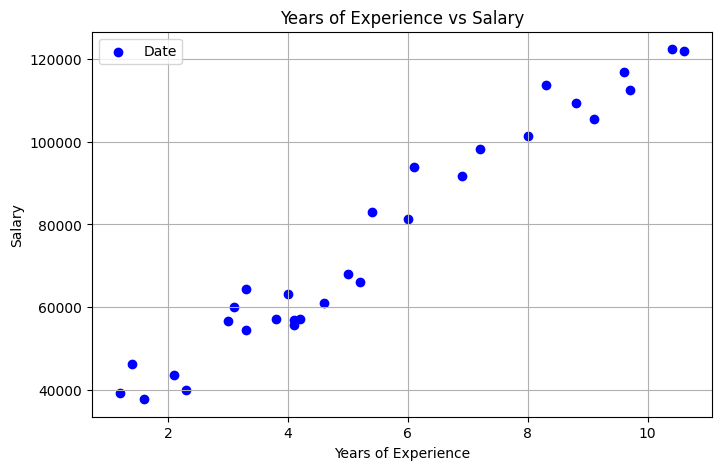

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Date')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.grid(True)
plt.legend()
plt.show()


with Seaborn

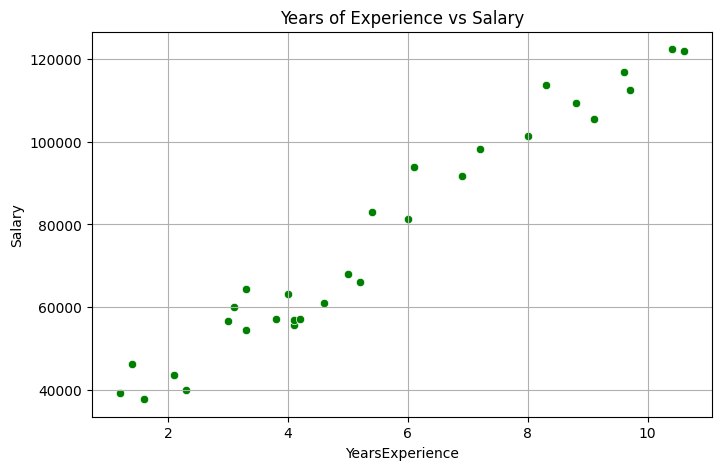

In [4]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='YearsExperience', y='Salary', color='green')
plt.title('Years of Experience vs Salary')
plt.grid(True)
plt.show()


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


# Correlation Matrix

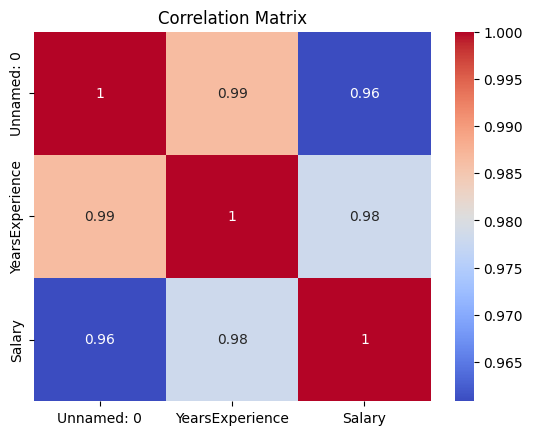

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 📊 Linear Regression Models


## Simple Linear Regression

Slope (coefficient): 9423.815323030976
Intercept: 24380.201479473704
R² Score: 0.9024461774180497
Root Mean Squared Error (RMSE): 7059.04362190151


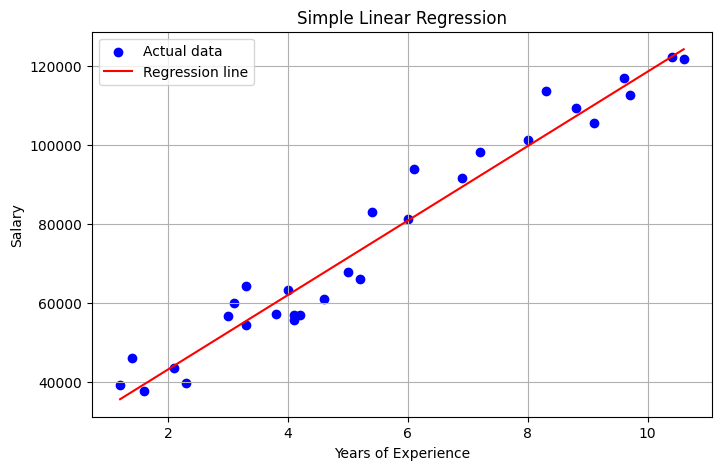

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

results = []
results.append({'RegressionType': 'Linear', 'R2Score': r2})

print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


## Ridge Regression

Slope (coefficient): 9376.749489639846
Intercept: 24629.062073529312
R² Score: 0.9021627846740264
Root Mean Squared Error (RMSE): 7069.289407005236


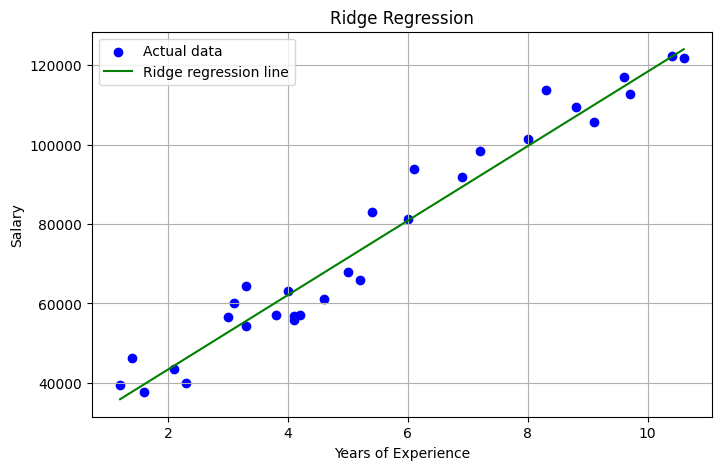

In [8]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

results.append({'RegressionType': 'Ridge', 'R2Score': r2})

print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='green', label='Ridge regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


## Polynomial Regression Models(2,3,4 Degree)

Coefficients: [   0.         8481.84129267   80.62084747]
Intercept: 26437.67801193487
R² Score: 0.8971645780890873
Root Mean Squared Error (RMSE): 7247.6145295383085


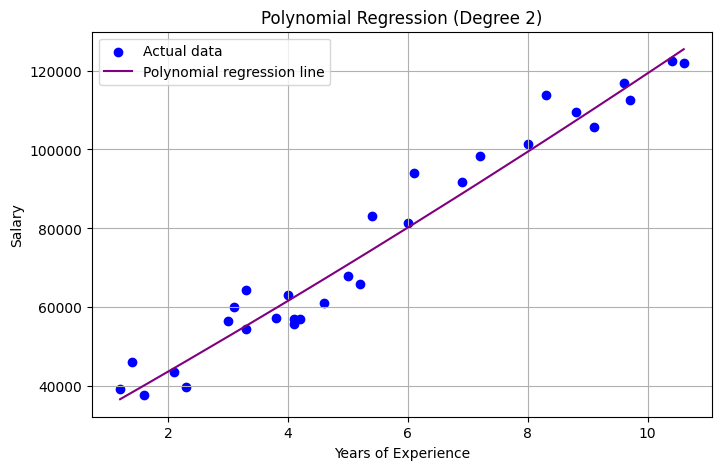

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

results.append({'RegressionType': 'Polynomial_2', 'R2Score': r2})

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(poly.transform(X)), color='purple', label='Polynomial regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()


Coefficients: [    0.         -1545.68533541  2130.08472377  -118.35909288]
Intercept: 39318.45851582203
R² Score: 0.904842988785486
Root Mean Squared Error (RMSE): 6971.78709742972


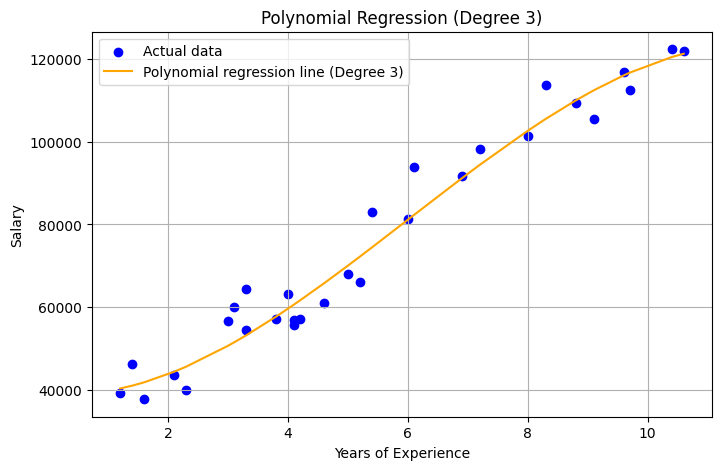

In [10]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

results.append({'RegressionType': 'Polynomial_3', 'R2Score': r2})

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(poly.transform(X)), color='orange', label='Polynomial regression line (Degree 3)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.grid(True)
plt.show()


Coefficients: [    0.         -7823.57096999  4220.84639397  -384.15341638
    11.34499537]
Intercept: 45048.127879623724
R² Score: 0.90297918790543
Root Mean Squared Error (RMSE): 7039.732754946539


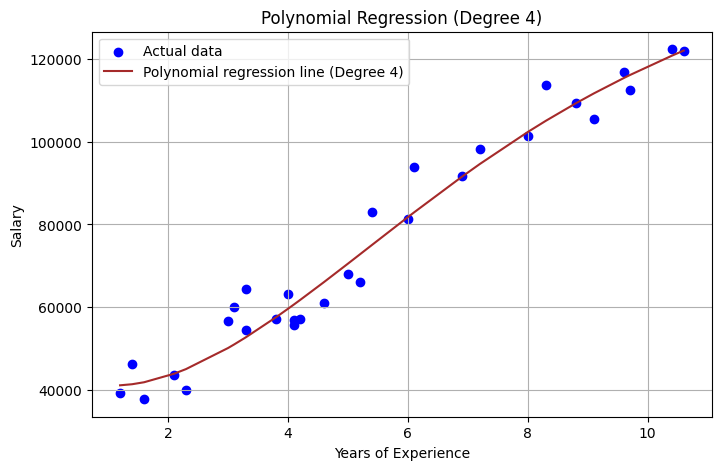

In [11]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

results.append({'RegressionType': 'Polynomial_4', 'R2Score': r2})

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(poly.transform(X)), color='brown', label='Polynomial regression line (Degree 4)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression (Degree 4)')
plt.legend()
plt.grid(True)
plt.show()


## Spline Regression Models (2,3,5 Segments)

R² Score: 0.9637312725898257
Root Mean Squared Error (RMSE): 5133.147541956998


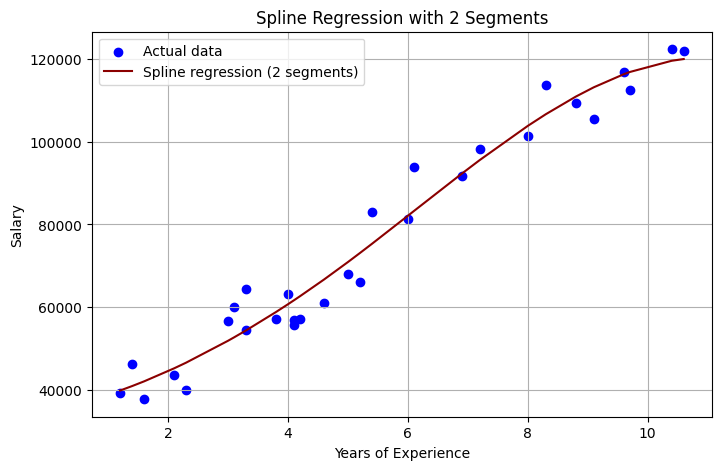

In [12]:
from scipy.interpolate import LSQUnivariateSpline

X_array = X.values.flatten()
knot = [np.median(X_array)]

model = LSQUnivariateSpline(X_array, y, t=knot)

y_pred = model(X_array)

r2 = r2_score(y, y_pred)

results.append({'RegressionType': 'Spline_2Segments', 'R2Score': r2})

print("R² Score:", r2)
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_array, y_pred, color='darkred', label='Spline regression (2 segments)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Spline Regression with 2 Segments')
plt.legend()
plt.grid(True)
plt.show()


R² Score: 0.9669403237976544
Root Mean Squared Error (RMSE): 4900.798950594401


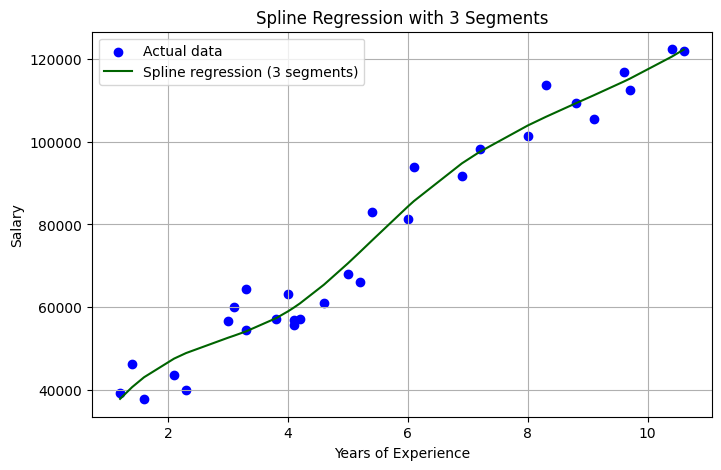

In [13]:

X_array = X.values.flatten()
knots = np.quantile(X_array, [1/3, 2/3])

model = LSQUnivariateSpline(X_array, y, t=knots)

y_pred = model(X_array)

r2 = r2_score(y, y_pred)

results.append({'RegressionType': 'Spline_3Segments', 'R2Score': r2})

print("R² Score:", r2)
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_array, y_pred, color='darkgreen', label='Spline regression (3 segments)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Spline Regression with 3 Segments')
plt.legend()
plt.grid(True)
plt.show()


R² Score: 0.9781392901830512
Root Mean Squared Error (RMSE): 3985.196299177737


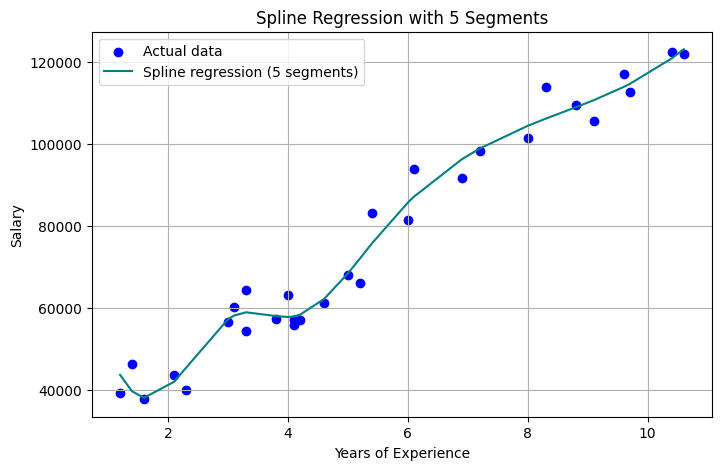

In [14]:
X_array = X.values.flatten()
knots = np.quantile(X_array, [1/5, 2/5, 3/5, 4/5])

model = LSQUnivariateSpline(X_array, y, t=knots)

y_pred = model(X_array)

r2 = r2_score(y, y_pred)

results.append({'RegressionType': 'Spline_5Segments', 'R2Score': r2})

print("R² Score:", r2)
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_array, y_pred, color='teal', label='Spline regression (5 segments)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Spline Regression with 5 Segments')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by='R2Score', ascending=False)
print(df_sorted)


     RegressionType   R2Score
7  Spline_5Segments  0.978139
6  Spline_3Segments  0.966940
5  Spline_2Segments  0.963731
3      Polynomial_3  0.904843
4      Polynomial_4  0.902979
0            Linear  0.902446
1             Ridge  0.902163
2      Polynomial_2  0.897165


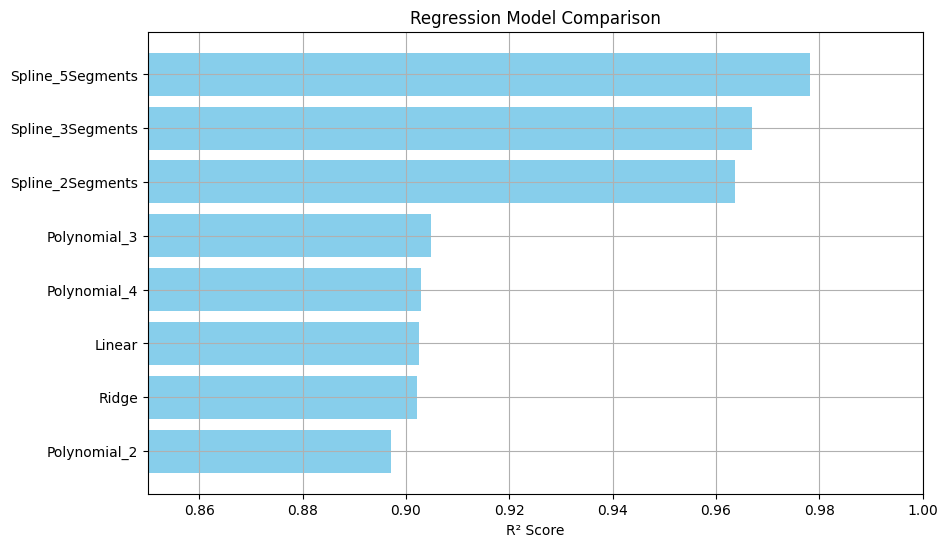

In [16]:

df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by='R2Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_sorted['RegressionType'], df_sorted['R2Score'], color='skyblue')
plt.xlabel('R² Score')
plt.title('Regression Model Comparison')
plt.xlim(0.85, 1)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
